# AI Receptionist

Took from: https://www.geeksforgeeks.org/python/python-loop-through-folders-and-files-in-directory/
and then edited it to read from json scripts

In [13]:
# Import module
import os
import json

# Assign base_path
base_path = r"C:\Users\banta\OneDrive\Desktop\AI Receptionist\data"

services = set()


# iterate over subfolders: train, dev, test
for split in ["train", "validation", "test"]:
    split_dir = os.path.join(base_path, split)
    for name in os.listdir(split_dir):
        if not name.endswith(".json"):
            continue
        with open(os.path.join(split_dir, name), encoding="utf-8") as f:
            print(f"Content of '{name}' in {split}")
            data = json.load(f)
            for dialogue in data:
                services.update(dialogue["services"])


print(services)

Content of 'dialogues_001.json' in train
Content of 'dialogues_002.json' in train
Content of 'dialogues_003.json' in train
Content of 'dialogues_004.json' in train
Content of 'dialogues_005.json' in train
Content of 'dialogues_006.json' in train
Content of 'dialogues_007.json' in train
Content of 'dialogues_008.json' in train
Content of 'dialogues_009.json' in train
Content of 'dialogues_010.json' in train
Content of 'dialogues_011.json' in train
Content of 'dialogues_012.json' in train
Content of 'dialogues_013.json' in train
Content of 'dialogues_014.json' in train
Content of 'dialogues_015.json' in train
Content of 'dialogues_016.json' in train
Content of 'dialogues_017.json' in train
Content of 'dialogues_001.json' in validation
Content of 'dialogues_002.json' in validation
Content of 'dialogues_001.json' in test
Content of 'dialogues_002.json' in test
{'bus', 'taxi', 'restaurant', 'train', 'hospital', 'hotel', 'attraction'}


Print the first raw dialogue script from each service (for test set only)

In [15]:
import json
import os

def preview_dialogues_by_service(directory, n=1):
    """
    Print the first n dialogues for each service in the dataset.
    
    directory: path to your train/ or test folder (contains dialogue_*.json files)
    n: how many dialogues to show per service
    """
    # collect dialogues per service
    service_examples = {}

    for filename in os.listdir(directory):
        if not filename.endswith(".json"):
            continue
        with open(os.path.join(directory, filename), "r", encoding="utf-8") as f:
            data = json.load(f)
            for dialogue in data:
                services = dialogue.get("services", [])
                for service in services:
                    if service not in service_examples:
                        service_examples[service] = []
                    # store whole dialogue text (all turns)
                    dialogue_text = "\n".join(
                        [f"{turn['speaker']}: {turn['utterance']}" for turn in dialogue["turns"]]
                    )
                    if len(service_examples[service]) < n:
                        service_examples[service].append((dialogue["dialogue_id"], dialogue_text))
    
    # print results
    for service, examples in service_examples.items():
        print(f"\n=== {service.upper()} (showing {len(examples)} dialogues) ===\n")
        for did, text in examples:
            print(f"Dialogue ID: {did}")
            print(text)
            print("-" * 60)

# Example usage
preview_dialogues_by_service(
    r"C:\Users\banta\OneDrive\Desktop\AI Receptionist\data\test", 
    n=1
)


=== ATTRACTION (showing 1 dialogues) ===

Dialogue ID: MUL0484.json
USER: I need train reservations from norwich to cambridge
SYSTEM: I have 133 trains matching your request. Is there a specific day and time you would like to travel?
USER: I'd like to leave on Monday and arrive by 18:00.
SYSTEM: There are 12 trains for the day and time you request. Would you like to book it now?
USER: Before booking, I would also like to know the travel time, price, and departure time please.
SYSTEM: There are 12 trains meeting your needs with the first leaving at 05:16 and the last one leaving at 16:16. Do you want to book one of these?
USER: No hold off on booking for now. Can you help me find an attraction called cineworld cinema?
SYSTEM: Yes it is a cinema located in the south part of town what information would you like on it?
USER: Yes, that was all I needed. Thank you very much!
SYSTEM: Thank you for using our system.
------------------------------------------------------------

=== TRAIN (show

Dataframe

In [16]:
import os
import json
import pandas as pd

def load_dialogues_to_df(directory):
    rows = []
    
    for filename in os.listdir(directory):
        if not filename.endswith(".json"):
            continue
        with open(os.path.join(directory, filename), "r", encoding="utf-8") as f:
            data = json.load(f)
            for dialogue in data:
                dialogue_id = dialogue["dialogue_id"]
                services = dialogue.get("services", [])
                
                for turn_index, turn in enumerate(dialogue["turns"]):
                    intents = []
                    slot_values = {}
                    
                    for frame in turn.get("frames", []):
                        service = frame.get("service")
                        state = frame.get("state", {})
                        
                        if state.get("active_intent") and state["active_intent"] != "NONE":
                            intents.append(state["active_intent"])
                        if "slot_values" in state and state["slot_values"]:
                            for k, v in state["slot_values"].items():
                                slot_values[f"{service}-{k}"] = v
                                
                    rows.append({
                        "dialogue_id": dialogue_id,
                        "turn_index": turn_index,
                        "speaker": turn["speaker"],
                        "utterance": turn["utterance"],
                        "services": services,
                        "intents": intents,
                        "slot_values": slot_values
                    })
    
    return pd.DataFrame(rows)


# Load all splits into separate DataFrames
base_path = r"C:\Users\banta\OneDrive\Desktop\AI Receptionist\data"

train_df = load_dialogues_to_df(os.path.join(base_path, "train"))
val_df   = load_dialogues_to_df(os.path.join(base_path, "validation"))
test_df  = load_dialogues_to_df(os.path.join(base_path, "test"))

print("Train shape:", train_df.shape)
print("Dev shape:", val_df.shape)
print("Test shape:", test_df.shape)

print("\nSample row:\n", train_df.head(1).to_dict(orient="records"))


Train shape: (113552, 7)
Dev shape: (14748, 7)
Test shape: (14744, 7)

Sample row:
 [{'dialogue_id': 'PMUL4398.json', 'turn_index': 0, 'speaker': 'USER', 'utterance': 'i need a place to dine in the center thats expensive', 'services': ['restaurant', 'hotel'], 'intents': ['find_restaurant', 'find_hotel'], 'slot_values': {'restaurant-restaurant-area': ['centre'], 'restaurant-restaurant-pricerange': ['expensive']}}]


### Using the Data Wrangler Extension we can see there are no missing values for all three splits:
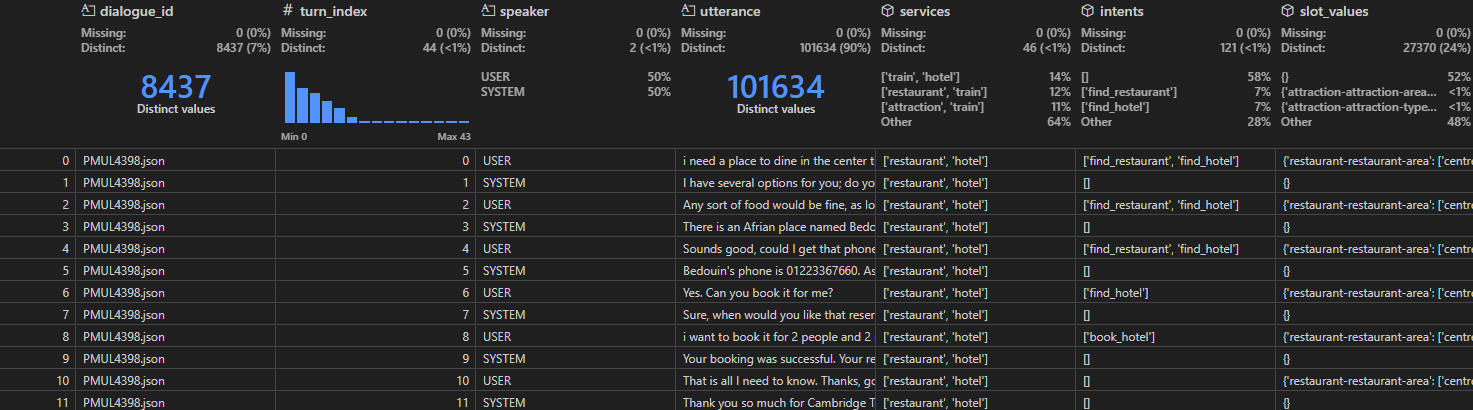
    
This data wrangler extension has proved to be very useful. From it, I can determine that in my train split there are:

1. No missing values in any column
2. Balanced speaker column - 50% user and 50% system
3. Intents are showing up (find_restaurant, find_hotel, book_hotel, etc.).
4. Slot values are there and look correct (restaurant-restaurant-area: centre, etc.).
5. ~8.4k dialogues, ~101k turns = plenty of data.


In [22]:
# Check all three splits are dataframes now:
test_df

,dialogue_id,turn_index,speaker,utterance,services,intents,slot_values
0,MUL0484.json,0,USER,I need train reservations from norwich to camb...,"[attraction, train]",[find_train],"{'train-train-departure': ['norwich'], 'train-..."
1,MUL0484.json,1,SYSTEM,I have 133 trains matching your request. Is th...,"[attraction, train]",[],{}
2,MUL0484.json,2,USER,I'd like to leave on Monday and arrive by 18:00.,"[attraction, train]",[find_train],"{'train-train-arriveby': ['18:00'], 'train-tra..."
3,MUL0484.json,3,SYSTEM,There are 12 trains for the day and time you r...,"[attraction, train]",[],{}
4,MUL0484.json,4,USER,"Before booking, I would also like to know the ...","[attraction, train]",[find_train],"{'train-train-arriveby': ['18:00'], 'train-tra..."
...,...,...,...,...,...,...,...
14739,MUL0527.json,7,SYSTEM,TR5648 will be departing cambridge Friday at 1...,"[attraction, train]",[],{}
14740,MUL0527.json,8,USER,That will work. Can I have this booking for si...,"[attraction, train]",[book_train],"{'attraction-attraction-name': ['dontcare'], '..."
14741,MUL0527.json,9,SYSTEM,I've booked that. Your reference number is 0IC...,"[attraction, train]",[],{}
14742,MUL0527.json,10,USER,Great thank you that should be all,"[attraction, train]",[],"{'attraction-attraction-name': ['dontcare'], '..."


In [23]:
val_df

,dialogue_id,turn_index,speaker,utterance,services,intents,slot_values
0,PMUL0698.json,0,USER,I'm looking for a local place to dine in the c...,"[restaurant, train]",[find_restaurant],"{'restaurant-restaurant-area': ['centre'], 're..."
1,PMUL0698.json,1,SYSTEM,I have restaurants matching your criteria in a...,"[restaurant, train]",[],{}
2,PMUL0698.json,2,USER,"I need the address, postcode and the price range.","[restaurant, train]",[find_restaurant],"{'restaurant-restaurant-area': ['centre'], 're..."
3,PMUL0698.json,3,SYSTEM,"Ok how about Charlie Chan, located at Regent S...","[restaurant, train]",[],{}
4,PMUL0698.json,4,USER,I also need a train. The train should leave af...,"[restaurant, train]",[find_train],"{'restaurant-restaurant-area': ['centre'], 're..."
...,...,...,...,...,...,...,...
14743,PMUL0077.json,7,SYSTEM,Booking was successful. The table will be rese...,"[restaurant, hotel]",[],{}
14744,PMUL0077.json,8,USER,I also need to get some information about The ...,"[restaurant, hotel]",[find_hotel],{'restaurant-restaurant-bookday': ['saturday']...
14745,PMUL0077.json,9,SYSTEM,The hotel is on the west side and has 4 stars....,"[restaurant, hotel]",[],{}
14746,PMUL0077.json,10,USER,"Not at this time, thank you.","[restaurant, hotel]",[],{'restaurant-restaurant-bookday': ['saturday']...


In [25]:
train_df

,dialogue_id,turn_index,speaker,utterance,services,intents,slot_values
0,PMUL4398.json,0,USER,i need a place to dine in the center thats exp...,"[restaurant, hotel]","[find_restaurant, find_hotel]","{'restaurant-restaurant-area': ['centre'], 're..."
1,PMUL4398.json,1,SYSTEM,I have several options for you; do you prefer ...,"[restaurant, hotel]",[],{}
2,PMUL4398.json,2,USER,"Any sort of food would be fine, as long as it ...","[restaurant, hotel]","[find_restaurant, find_hotel]","{'restaurant-restaurant-area': ['centre'], 're..."
3,PMUL4398.json,3,SYSTEM,There is an Afrian place named Bedouin in the ...,"[restaurant, hotel]",[],{}
4,PMUL4398.json,4,USER,"Sounds good, could I get that phone number? Al...","[restaurant, hotel]","[find_restaurant, find_hotel]","{'restaurant-restaurant-area': ['centre'], 're..."
...,...,...,...,...,...,...,...
113547,WOZ20469.json,5,SYSTEM,nandos serves portuguese food and in the cheap...,[restaurant],[],{}
113548,WOZ20469.json,6,USER,"I would like the address of Nandos restaurant,...",[restaurant],[find_restaurant],"{'restaurant-restaurant-area': ['dontcare'], '..."
113549,WOZ20469.json,7,SYSTEM,Nandos is located in the south part of the cit...,[restaurant],[],{}
113550,WOZ20469.json,8,USER,"Thank you, goodbye.",[restaurant],[],"{'restaurant-restaurant-area': ['dontcare'], '..."


In [ ]:
'''
🔑 2. Domain Filtering

Decide which dialogues you want.

Example: for a receptionist bot, maybe only hotel and restaurant services.

Drop irrelevant domains (like train or taxi).
'''

# 2: Domain Filtering

### The dataset has many services/domains as printed out earlier
(restaurant, hotel, taxi, train, bus, police, attraction, etc.)

#### My project is an AI receptionist. That means:
It’s supposed to answer the phone like a front desk / bookings assistant.

It doesn’t need to know every possible domain.

It should focus on the realistic business use cases for my PoC

SO domain filtering is necessary to ensure I do not waste time training the model on irrelevant tasks like bus routes or police stations

### Relevant services for an AI receptionist:

Restaurant and Hotel - both involve booking, cancelling, rescheduling and FAQs. 

Train/bus/police/attraction is not relevant.

Taxi is a maybe as it has intents such as pickup, dropoff, time and I could use it for a cab firm with no receptionist

But modern users just use Uber/Bolt so business case is quite weak. Let's just stick with restaurant and hotel.

For the PoC, we filtered domains to restaurant and hotel because they represent realistic use cases for small business receptionists, where missed calls translate directly into lost revenue. Domains like bus or police were excluded as they are not relevant to commercial booking workflows. Taxi was considered optional but ultimately excluded due to weaker business relevance in markets already dominated by app-based booking platforms.

In [ ]:
'''
🔑 3. Turn Filtering

Decide which speaker turns you care about.

If you want your model to act like a receptionist:

Focus on SYSTEM turns (the answers).

Optionally keep USER turns as the context.
'''

In [4]:

'''
🔑 4. Text Cleaning

Normalize the utterances:

Lowercasing (optional, depends on model).

Remove punctuation or special tokens.

Fix spacing issues.

Replace anonymized tokens if the dataset uses them ([value_name], etc.).

👉 Ensures your model isn’t distracted by artefacts.
'''

'\n🔑 4. Text Cleaning\n\nNormalize the utterances:\n\nLowercasing (optional, depends on model).\n\nRemove punctuation or special tokens.\n\nFix spacing issues.\n\nReplace anonymized tokens if the dataset uses them ([value_name], etc.).\n\n👉 Ensures your model isn’t distracted by artefacts.\n'

In [5]:
'''
🔑 5. Slot & State Handling (optional, more advanced)

If you want your receptionist to also track info (like booking details), you’ll need to extract slot values from frames → state.

Example:
"hotel-pricerange": ["expensive"] → add column price_range = expensive.

Store them as structured columns (hotel_name, date, price_range).

This could let you compare:

Simple baseline: pure text prediction.

Advanced: slot-aware model.

👉 Adds depth if you want higher marks for technical sophistication.
'''

'\n🔑 5. Slot & State Handling (optional, more advanced)\n\nIf you want your receptionist to also track info (like booking details), you’ll need to extract slot values from frames → state.\n\nExample:\n"hotel-pricerange": ["expensive"] → add column price_range = expensive.\n\nStore them as structured columns (hotel_name, date, price_range).\n\nThis could let you compare:\n\nSimple baseline: pure text prediction.\n\nAdvanced: slot-aware model.\n\n👉 Adds depth if you want higher marks for technical sophistication.\n'

In [6]:
''' 
🔑 6. Context Building

Conversations aren’t single sentences — they depend on history.

Build training pairs:

Input = user history up to now.

Output = system reply.


OR


Input = concatenated user turns up to time t.

Output = system turn at time t.

Example pair:
USER: I want a cheap restaurant in the north
SYSTEM: Golden Wok is in the north and cheap.

Decide window size: all history vs. last 2–3 turns.

👉 Turns dialogues into usable supervised data.
'''

' \n🔑 6. Context Building\n\nConversations aren’t single sentences — they depend on history.\n\nBuild training pairs:\n\nInput = user history up to now.\n\nOutput = system reply.\n\n\nOR\n\n\nInput = concatenated user turns up to time t.\n\nOutput = system turn at time t.\n\nExample pair:\nUSER: I want a cheap restaurant in the north\nSYSTEM: Golden Wok is in the north and cheap.\n\nDecide window size: all history vs. last 2–3 turns.\n\n👉 Turns dialogues into usable supervised data.\n'

In [7]:
''' 🔑 7. Splitting & Balancing

Make sure you have proper train/validation/test splits.

Standard: 80/10/10 split (train/val/test).

Check class balance (e.g., not all examples are restaurant, some hotel too).
'''

' 🔑 7. Splitting & Balancing\n\nMake sure you have proper train/validation/test splits.\n\nStandard: 80/10/10 split (train/val/test).\n\nCheck class balance (e.g., not all examples are restaurant, some hotel too).\n'

In [8]:
'''
🔑 8. Feature Formatting

Convert your cleaned data into a format your model accepts:

For ML/Deep Learning → often a .csv or .parquet with input_text and target_text.

For classical ML → structured features (slots, intents, etc.).

Two possible directions:

Classical ML (baseline):

Input = TF-IDF features of user turns.

Output = intent/response label.

Neural Seq2Seq / Transformers (advanced):

Input = raw text (user history).

Output = raw text (system reply).

👉 Save in .csv or HuggingFace dataset format.
'''

'\n🔑 8. Feature Formatting\n\nConvert your cleaned data into a format your model accepts:\n\nFor ML/Deep Learning → often a .csv or .parquet with input_text and target_text.\n\nFor classical ML → structured features (slots, intents, etc.).\n\nTwo possible directions:\n\nClassical ML (baseline):\n\nInput = TF-IDF features of user turns.\n\nOutput = intent/response label.\n\nNeural Seq2Seq / Transformers (advanced):\n\nInput = raw text (user history).\n\nOutput = raw text (system reply).\n\n👉 Save in .csv or HuggingFace dataset format.\n'

In [50]:
''' 
🔑 9. Sanity Checks

Make sure no empty texts.

Check that your domains and speakers make sense.

Spot-check 5–10 random dialogues manually to confirm preprocessing didn’t break meaning.
'''

' \n🔑 9. Sanity Checks\n\nMake sure no empty texts.\n\nCheck that your domains and speakers make sense.\n\nSpot-check 5–10 random dialogues manually to confirm preprocessing didn’t break meaning.\n'

In [9]:
''' 
⏳ How long should this take?

Steps 1–4: 2–3 focused sessions (~1 day).

Steps 5–6: Optional, adds ~2 days if you want slot handling.

Steps 7–9: 1 session (~half a day).

So preprocessing is about 3–5 days max if you’re systematic. That’s enough to get you a dataset you can actually model with, without falling into the “paradox of choice.”
'''

' \n⏳ How long should this take?\n\nSteps 1–4: 2–3 focused sessions (~1 day).\n\nSteps 5–6: Optional, adds ~2 days if you want slot handling.\n\nSteps 7–9: 1 session (~half a day).\n\nSo preprocessing is about 3–5 days max if you’re systematic. That’s enough to get you a dataset you can actually model with, without falling into the “paradox of choice.”\n'